In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

filename = '0cdf5b5d0ce1_03'

img = np.array(Image.open("inputs/train/{}.jpg".format(filename)))
label = np.array(Image.open("inputs/train_masks/{}_mask.gif".format(filename)))

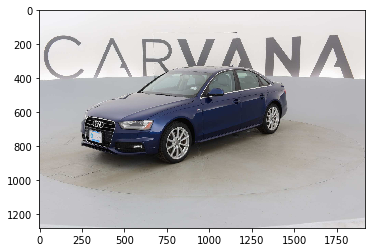

In [11]:
plt.imshow(img)

In [3]:
from keras.models import load_model

model = load_model('first_model.hdf5')
prediction = model.predict(img[np.newaxis, :, :, :])

C:\Users\SunQ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


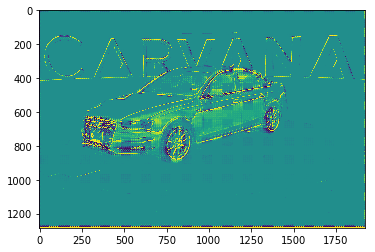

In [12]:
prediction = model.predict(img[np.newaxis, :, :, :])
plt.imshow(prediction[0, :, :, 0])

In [5]:
prediction[0, :, :, 0]

array([[1.1405788e-02, 6.5317629e-03, 9.8209118e-04, ..., 2.2235213e-01,
        4.3602448e-02, 3.6876932e-01],
       [4.5430316e-03, 2.5651148e-01, 2.0960923e-01, ..., 6.7023137e-03,
        2.9170382e-05, 8.1971139e-02],
       [1.4091232e-02, 8.6057313e-02, 4.7613263e-02, ..., 8.7901456e-03,
        4.0002949e-05, 2.7342711e-02],
       ...,
       [8.1758702e-07, 8.1097955e-01, 6.1300496e-05, ..., 9.9975604e-01,
        9.1450477e-01, 9.9999511e-01],
       [8.0207765e-02, 1.2163770e-03, 1.7089210e-02, ..., 9.9999988e-01,
        9.9892932e-01, 5.3411388e-01],
       [4.5440218e-01, 9.9944466e-01, 1.0550299e-04, ..., 5.0358021e-01,
        1.9063173e-01, 6.3702017e-01]], dtype=float32)

In [3]:
from model_keras import model

model(img, label)

C:\Users\SunQ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\SunQ\Projects\Kaggle_Carvana_Image_Segmentation\model_keras.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input=X_input, outputs=X_out)


In [23]:
(568 - 392)/2

88.0

In [9]:
np.random.randint?

In [1]:
%run utils/img2patch.py

In [69]:
file = pd.read_csv('inputs/metadata.csv')
file.head()

,id,year,make,model,trim1,trim2
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg


In [103]:
%run utils/patch_data.py

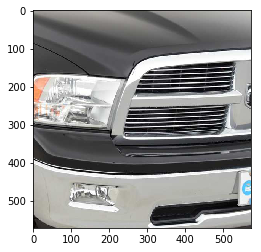

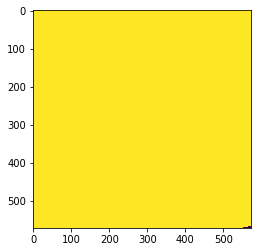

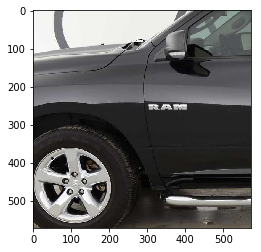

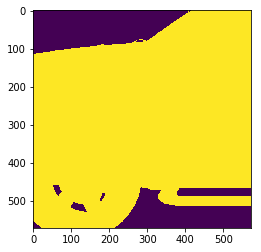

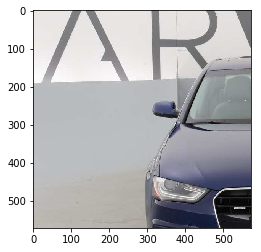

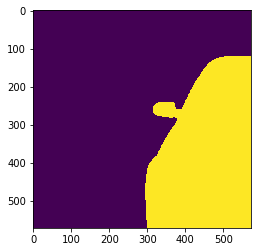

In [105]:
from utils.patch_data import load_data
images, labels = load_data()

for index in range(3):

    plt.imshow(images[index, :, :, :])
    plt.show()
    plt.imshow(labels[index, :, :, 0])
    plt.show()

In [101]:
images.shape

(30, 572, 572, 3)

In [1]:
%run train_keras.py

C:\Users\SunQ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'inputs/train_masks/f1eb080c7182_05_mask.gif'

In [2]:
from keras.preprocessing.image import ImageDataGenerator



In [3]:
gen = ImageDataGenerator()

In [9]:
gen.flow_from_directory('inputs/train/')

Found 0 images belonging to 0 classes.


In [18]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('inputs/train_masks.csv', usecols=['rle_mask'])
data.head()



,rle_mask
0,879386 40 881253 141 883140 205 885009 17 8850...
1,873779 4 875695 7 877612 9 879528 12 881267 15...
2,864300 9 866217 13 868134 15 870051 16 871969 ...
3,879735 20 881650 26 883315 92 883564 30 885208...
4,883365 74 883638 28 885262 119 885550 34 88716...


In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
mask = data['rle_mask'][0]

In [27]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

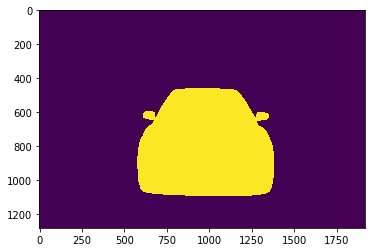

In [32]:
plt.imshow(rle_decode(mask, (1280, 1918)))